<a href="https://colab.research.google.com/github/betheman/CNN/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
#load mnist dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data() #everytime loading data won't be so easy :)

Using TensorFlow backend.


11493376/11490434 [==============================] - 2s 0us/step


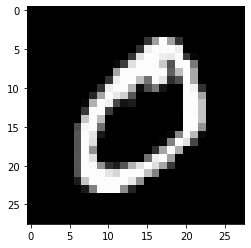

In [0]:
plt.tight_layout()
plt.imshow(X_train[1], cmap='gray', interpolation='none')

In [0]:
X_train.shape

(60000, 28, 28)

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape) #X_train shape: (60000, 28, 28, 1)

X_train shape: (60000, 28, 28, 1)


In [0]:
num_category = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_category)
y_test = keras.utils.to_categorical(y_test, num_category)

In [0]:
y_train.shape

(60000, 10)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten
import tensorflow.python.keras as tk

In [0]:
##model building
model = Sequential()
#convolutional layer with rectified linear unit activation
model.add(Conv2D(32, kernel_size=(3, 3),
                 input_shape=input_shape))
#32 convolution filters used each of size 3x3
#again
model.add(Conv2D(64, (3, 3), activation='relu'))
#64 convolution filters used each of size 3x3
#choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
#randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
#flatten since too many dimensions, we only want a classification output
model.add(Flatten())
#fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
#one more dropout for convergence' sake :) 
model.add(Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
model.add(Dense(num_category, activation='softmax'))

In [0]:
#Adaptive learning rate (adaDelta) is a popular form of gradient descent rivaled only by adam and adagrad
#categorical ce since we have multiple classes (10) 
model.compile(loss=tk.losses.categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy'])

In [0]:
batch_size = 128
num_epoch = 10
#model training
model_log = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 124s 263ms/step - loss: 0.2333 - accuracy: 0.9284 - val_loss: 0.0529 - val_accuracy: 0.9820
Epoch 2/10
469/469 [==============================] - 123s 263ms/step - loss: 0.0876 - accuracy: 0.9738 - val_loss: 0.0397 - val_accuracy: 0.9862
Epoch 3/10
469/469 [==============================] - 123s 263ms/step - loss: 0.0682 - accuracy: 0.9796 - val_loss: 0.0397 - val_accuracy: 0.9873
Epoch 4/10
469/469 [==============================] - 123s 262ms/step - loss: 0.0582 - accuracy: 0.9814 - val_loss: 0.0352 - val_accuracy: 0.9885
Epoch 5/10
469/469 [==============================] - 123s 262ms/step - loss: 0.0497 - accuracy: 0.9842 - val_loss: 0.0367 - val_accuracy: 0.9875
Epoch 6/10
469/469 [==============================] - 122s 260ms/step - loss: 0.0428 - accuracy: 0.9864 - val_loss: 0.0380 - val_accuracy: 0.9873
Epoch 7/10
469/469 [==============================] - 123s 263ms/step - loss: 0.0393 - accuracy: 0.9873 - val_loss: 0.0335 -

In [0]:
model_log.history

In [0]:
import pandas as pd

In [0]:
data={'loss':model_log.history['loss'],'val_loss':model_log.history['val_loss']}

In [0]:
df=pd.DataFrame(data)

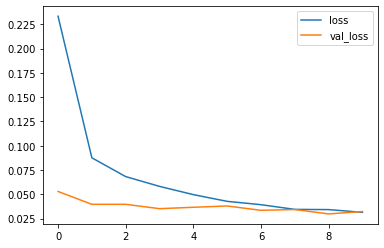

In [0]:
df.plot()

In [0]:
predictions=model.predict(X_test)

In [0]:
predicted_result=[]
for output in predictions:
    output_arr=np.where(output>0.5)[0]
    if len(output_arr)>0:
      predicted_result.append(output_arr[0])
    else:
      predicted_result.append(-1)
    
   

In [0]:
true_result=[]
for true_output in y_test:
    true_output_arr=np.where(true_output>0.5)[0]
    if len(output_arr)>0:
      true_result.append(true_output_arr[0])
    else:
      true_result.append(-1)
    
   

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
diff_result=(np.array(predicted_result)-np.array(true_result))

In [0]:
  sr=pd.Series(diff_result)

In [0]:
sr.value_counts()

In [0]:
len(y_test)

10000

In [0]:
accuracy=98.85

In [0]:
#Save the model
# serialize model to JSON
model_digit_json = model.to_json()
with open("/content/drive/My Drive/Colab Notebooks/Models/CNN/model_digit.json", "w") as json_file:
    json_file.write(model_digit_json)
# serialize weights to HDF5
model.save_weights("/content/drive/My Drive/Colab Notebooks/Models/CNN/model_digit.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
import numpy as np
array = np.arange(8).reshape(2, 2, 2,1)

In [0]:
array

array([[[[0],
         [1]],

        [[2],
         [3]]],


       [[[4],
         [5]],

        [[6],
         [7]]]])